In [18]:
# import python libraries to handle datasets
import numpy as np
import pandas as pd
from collections import Counter


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


%matplotlib inline


pd.pandas.set_option('display.max_columns', None)

from jupyterthemes import jtplot
jtplot.style(theme='onedork')


# 1. Business Understanding

The following questions will be focued on:

What Programming Languages are most used to work and Which Programming Languages are most Required in Stackoverflow survey data of 2017 and 2018 ?

How does Programming Languages used at work relates with Programming Languages, People Wants to Learn in USA According to Stackoverflow survey data of 2017 and 2018?


What are the most wanted Programming Languages in USA According to Stackoverflow survey data of 2017 and 2018?

# 2. Data Understanding

In [40]:
import chardet
# detect file encoding
with open("C:/DataScienceNanoDegree/stackoverflowdata/2011 Stack Overflow Survey Results/2011 Stack Overflow Survey Results.csv","rb") as file:
    print(chardet.detect(file.read()))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [19]:
df1 = pd.read_csv("X:/DataScienceNanoDegree/stackoverflowdata/2011 Stack Overflow Survey Results/2011 Stack Overflow Survey Results.csv", encoding = 'ISO-8859-1')
df2 = pd.read_csv("X:/DataScienceNanoDegree/stackoverflowdata/2012 Stack Overflow Survey Results/2012 Stack Overflow Survey Results.csv", encoding = 'ISO-8859-1')
df3 = pd.read_csv("X:/DataScienceNanoDegree/stackoverflowdata/2013 Stack Overflow Survey Responses/2013 Stack Overflow Survey Responses.csv", encoding = 'ISO-8859-1')
df4 = pd.read_csv("X:/DataScienceNanoDegree/stackoverflowdata/2014 Stack Overflow Survey Responses/2014 Stack Overflow Survey Responses.csv", encoding = 'ISO-8859-1')
df5 = pd.read_csv("X:/DataScienceNanoDegree/stackoverflowdata/2015 Stack Overflow Developer Survey Responses/2015 Stack Overflow Developer Survey Responses.csv",skiprows=1, encoding = 'ISO-8859-1')
df6 = pd.read_csv("X:/DataScienceNanoDegree/stackoverflowdata/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv", encoding = 'ISO-8859-1')
df7 = pd.read_csv("X:/DataScienceNanoDegree/stackoverflowdata/developer_survey_2017/survey_results_public.csv", encoding = 'ISO-8859-1')

df8 = pd.read_csv("X:/DataScienceNanoDegree/stackoverflowdata/developer_survey_2018/survey_results_public.csv", encoding = 'ISO-8859-1')
df9 = pd.read_csv("X:/DataScienceNanoDegree/stackoverflowdata/developer_survey_2019/survey_results_public.csv", encoding = 'ISO-8859-1')
df10 = pd.read_csv("X:/DataScienceNanoDegree/stackoverflowdata/developer_survey_2020/survey_results_public.csv", encoding = 'ISO-8859-1')


In [20]:
dfs= [df1, df2, df3, df4, df5, df6, df7, df8, df9,df10]

In [21]:
#looking into sample data
df8.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"Iâm not actively looking, but I am open to n...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,U

In [11]:
df8.head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
count,2814,1030,2730,2730,2730,2647,2647,2611,1362,1497,...,117,395,502,377,598,825,315,219,2506,2533
unique,20,52,9,5,13,7,14,6,1,1,...,1,1,1,1,1,1,1,148,8,8
top,United States of America,California,25-29,11,Software Products,Start Up (1-25),Web Application Developer,It's been known to happen,Influencer,Recommender,...,AppleTV,iPad,Other netbook,PS3,Xbox,Wii,Other gaming system,iPod Touch,"$1,001-$2,000",Stack Overflow
freq,1037,122,831,1044,814,745,1066,1060,1362,1497,...,117,395,502,377,598,825,315,27,569,2230


In [42]:
#Q1: What Programming Languages most used to work and Which Programming Languages
#in Stackoverflow survey data of 2017 and 2018

In [ ]:
# Data prepration
# i need to drop na values as more missing values makes data not balanced
# Reference :: https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

In [24]:

#First make copy of dataframe and then Filter a dataframe by country 
def country(df, column_filter, country, columns): 
    '''
    Filter a dataframe by country(i.e. why i use dropna to drop all other country excpet India)
    Returns filtred dataframe
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filtering the dataframe 
us2017 = country(df7, 'Country', 'United States', ['HaveWorkedLanguage', 'WantWorkLanguage'])
us2018 = country(df8, 'Country', 'United States', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

In [25]:
#Spliting the columns
def split_column(df, column):
    '''
    Split column by ;,
    Returns a splited series.
    '''
    df_copy = df
    columnSeries = df_copy[column].apply(lambda x: x.split(';'))
    return columnSeries

# Splitting the dataframe by columns.
worked_languages_2017 = split_column(us2017, 'HaveWorkedLanguage')
wanted_languages_2017 = split_column(us2017, 'WantWorkLanguage')

worked_languages_2018 = split_column(us2018, 'LanguageWorkedWith')
wanted_languages_2018 = split_column(us2018, 'LanguageDesireNextYear')

In [26]:
#flatten the list
def flat(array_list):
    '''
    Flat a nested list,
    Returns a flat list.
    '''
    object_list = []
    for row in array_list:
        for obj in row:
            object_list.append(obj.strip())
            
    return object_list

# Flatting nested list objects.
list_worked_languages_2017 = flat(worked_languages_2017)
list_wanted_languages_2017 = flat(wanted_languages_2017)

list_worked_languages_2018 = flat(worked_languages_2018)
list_wanted_languages_2018 = flat(wanted_languages_2018)

In [27]:
def list_of_group(data_list, year):
    '''
    Group by count to a list,
    Returns a result dict
    '''
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    return grouped_dict

# Grouping the list and creating a dict.
dict_worked_languages_2017 = list_of_group(list_worked_languages_2017, '2017')
dict_wanted_languages_2017 = list_of_group(list_wanted_languages_2017, '2017')

dict_worked_languages_2018 = list_of_group(list_worked_languages_2018, '2018')
dict_wanted_languages_2018 = list_of_group(list_wanted_languages_2018, '2018')

In [ ]:
#Prepare data model

In [28]:
def create_dataframe(data_dicts): 
    '''
    Create two dataframes and append them,
    Returns a appended dataframe.
    '''
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])
    df = df1.append(df2)
    return df

worked_languages = create_dataframe([dict_worked_languages_2017, dict_worked_languages_2018])
wanted_languages = create_dataframe([dict_wanted_languages_2017, dict_wanted_languages_2018])

In [29]:
#calculating % used vs desired languages
def percentage(df, column):
    '''
    Scale data,
    Returns data scaled.
    '''
    df_copy = df
    series = []
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                        df_copy[df_copy[column] == val]['Count'].sum())
    
    joined = pd.Series()
    for i_series in series:
        joined = joined.append(i_series)
        
    return joined

worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

In [30]:
# identify top 10 languages
top_10_work = worked_languages.sort_values(by=['Percentage'], ascending=False).head(12)['Programming Language'].unique()
top_10_want = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(12)['Programming Language'].unique()

worked_chart = worked_languages[worked_languages['Programming Language'].isin(top_10_work)]
wanted_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_10_want)]

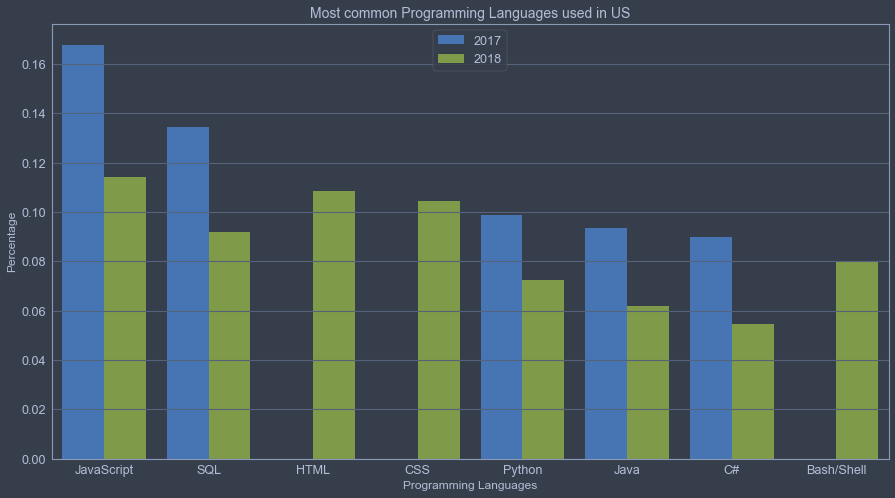

In [43]:

plt.figure(figsize=(15,8))
sns.barplot(x = 'Programming Language', 
            y = 'Percentage',
            hue = 'Year',
            data = worked_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Programming Languages", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.legend(title_fontsize='40')
plt.title('Most common Programming Languages used in US', size = 14)
plt.show()

In [ ]:
#Verify the results from above plot

The Highest Rate of percentage among all Programming Languages JavaScript have highest growth rate in 2017 
which is around 16% whereas this percentage is drop significantly in 2018 about 4% in USA.

As we can see through Graph, Java has same drop percentage about 4% in USA along with SQL

The Most Intersting this about this Graph is HTML and CSS it was probably not possible to

select these two Languages as option in 2017 whereas in 2018 these two Programming Languages have risen such as HTML and CSS.
Intresting shell comes from no where even though its there for a while might be 2017 there might be data issue with survery

In [ ]:
#How does Programming Languages used at work relates with Programming Languages, 
#People Wants to Learn in US According to Stackoverflow survey data of 2017 and 2018


In [ ]:
#Date preparation

In [34]:
row = []
for j in list(zip(worked_languages_2018, wanted_languages_2018)):
    for i in j[0]:
        row.append({
            'Worked_Programming_Languages': i, 
            'Wanted_Programming_Languages': Counter(j[0])
        })
        
programming_language_transition = pd.DataFrame(row).groupby('Worked_Programming_Languages')\
                                            .agg({'Wanted_Programming_Languages': 'sum'}).reset_index()

In [ ]:
#similar to above approach prepare data

In [35]:
for row in programming_language_transition['Worked_Programming_Languages']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_Programming_Languages']).items()])
    for key, value in dict(row['Wanted_Programming_Languages']).items():
         programming_language_transition[key].loc[index] = (value / total)

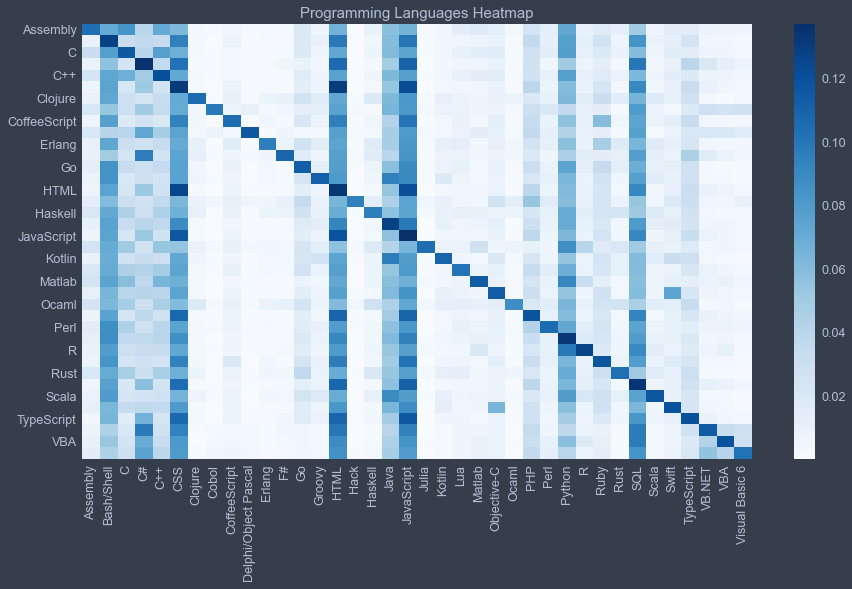

In [37]:
prlt = programming_language_transition.drop('Wanted_Programming_Languages', axis=1)\
                                        .set_index('Worked_Programming_Languages')

plt.figure(figsize=(15, 8))
sns.heatmap(prlt, cmap = "Blues")
plt.title('Heatmap', size = 15)
plt.ylabel('')
plt.show()

In [ ]:
#Verify the heatmap above and identified keu insights

With this Graph we can have some insights and they are:
HTML is highly correlated with every Programming Language (except: Rust, Ocaml, Julia, Hack, Haskell and Clojure) 
and CSS also have same trends like HTML.

There are around 27 Programming Language which has nearly no correlation among them with anyone.

HTML has strongest correlation between CSS and JavaScript (i.e. about 12% to 14%).
There is one noticeable thing that Objectice C and Swift are strongly correlated with each other (i.e. about 10% to 12%).

In [ ]:
#What are the most wanted Programming Languages in USA
#According to Stackoverflow survey data of 2017 and 2018?

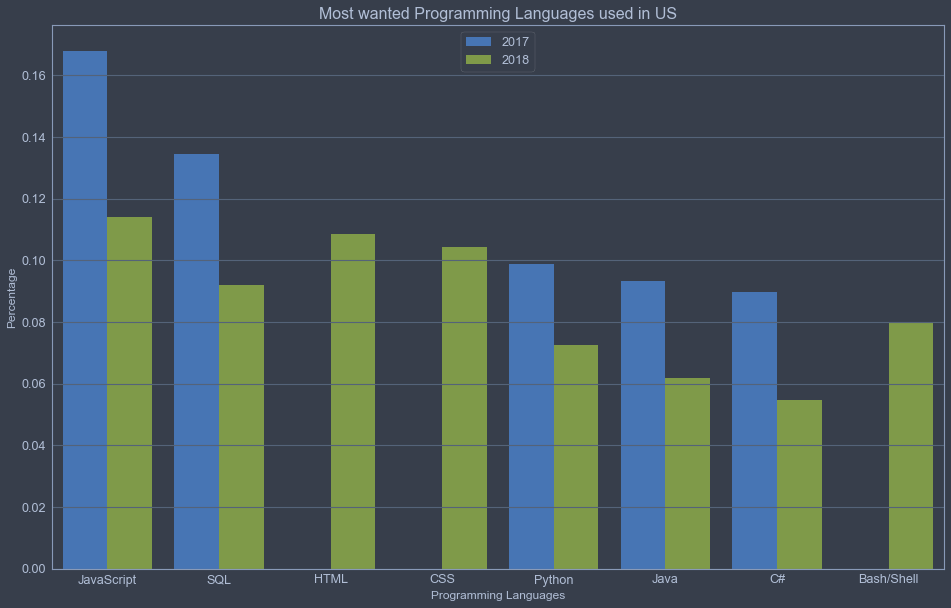

In [39]:
plt.figure(figsize=(16,10))
sns.barplot(x = 'Programming Language', 
            y = 'Percentage',
            hue = 'Year',
            data = worked_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in US', size = 16)
plt.xlabel("Programming Languages", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.legend(title_fontsize='40')
plt.show()

In [ ]:
#By looking at above diagram identiy the key insights as below

most of the programming languages that have appeared as programming languages most
used at work, also appeared in the ranking of most wanted programming languages, 
this show us that are many people wanting to learn these languages.